In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/might/Desktop/Python Code Snips/Homework1/Housing.csv')
housing1 = pd.read_csv('/Users/might/Desktop/Python Code Snips/Homework1/Housing.csv')
housing2 = pd.read_csv('/Users/might/Desktop/Python Code Snips/Homework1/Housing.csv')
M=len(df)


In [2]:
#list of variables
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea', 'furnishingstatus']
def binary_map(x):
    return x.map({'yes':1,'no':0})
df[varlist] = df[varlist].apply(binary_map) 
housing1[varlist] = housing1[varlist].apply(binary_map)
housing2[varlist] = housing2[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,NaN
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,NaN
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,NaN
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,NaN
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,NaN


In [3]:
#Split Data
from sklearn.model_selection import train_test_split

#Specify training and random seed
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)
df_train.shape
df_test.shape

#Variables
p = df_train.values[:,0] #column 1
a = df_train.values[:,1] #column 2
bed = df_train.values[:,2] #column 3
bath = df_train.values[:,3] #column 4
st = df_train.values[:,4] #column 5
main = df_train.values[:,5] #column 6
guest = df_train.values[:,6] #column 7
base = df_train.values[:,7] #column 8
hot = df_train.values[:,8] #column 9
ac = df_train.values[:,9] #column 10
park = df_train.values[:,10] #column 11
pref = df_train.values[:,11] #column 12
furnish = df_train.values[:,12] #column 13

m = len(df_train)


In [4]:
num_vars = ['area', 'bedrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,stories,parking,price
126,7160,3,1,2,5880000
363,3584,2,1,0,3710000
370,4280,2,1,2,3640000
31,7000,3,4,2,8400000
113,9620,3,1,2,6083000


In [5]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [6]:
X_Newtrain.head()

,area,bedrooms,stories,parking
126,7160,3,1,2
363,3584,2,1,0
370,4280,2,1,2
31,7000,3,4,2
113,9620,3,1,2


In [7]:
y_Newtrain.head()

126    5880000
363    3710000
370    3640000
31     8400000
113    6083000
Name: price, dtype: int64

In [8]:
#Problem 1
#Regression
#Reshape
X_0 = np.ones((m, 1))
rearea = a.reshape(m,1)
rebed = bed.reshape(m,1)
rebath = bath.reshape(m,1)
restories = st.reshape(m,1)
reparking = park.reshape(m,1)
#stack
#a = np.hstack((X_0, rearea))
#bed = np.hstack((X_0, rebed))
#bath = np.hstack((X_0, rebath))
#st = np.hstack((X_0, restories))
#park = np.hstack((X_0, reparking))

In [9]:
#test data X2
#Variables
p2 = df_test.values[:,0] #column 1
a2 = df_test.values[:,1] #column 2
bed2 = df_test.values[:,2] #column 3
bath2 = df_test.values[:,3] #column 4
st2 = df_test.values[:,4] #column 5
main2 = df_test.values[:,5] #column 6
guest2 = df_test.values[:,6] #column 7
base2 = df_test.values[:,7] #column 8
hot2 = df_test.values[:,8] #column 9
ac2 = df_test.values[:,9] #column 10
park2 = df_test.values[:,10] #column 11
pref2 = df_test.values[:,11] #column 12
furnish2 = df_test.values[:,12] #column 13
n = len(df_test)

In [10]:
#reshape
X_02 = np.ones((n, 1))
rearea2 = a2.reshape(n,1)
rebed2 = bed2.reshape(n,1)
rebath2 = bath2.reshape(n,1)
restories2 = st2.reshape(n,1)
reparking2 = park2.reshape(n,1)

In [11]:
#Stack
stackp1 = np.hstack((X_0, rearea, rebed, rebath, restories, reparking))
stackp2 = np.hstack((X_02, rearea2, rebed2, rebath2, restories2, reparking2))
thetap1 = np.zeros(6)
alpha = 0.000001
iterations = 1500

In [12]:
#cost function
def compute_cost(X, y, m, theta): #pass extra m
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

In [13]:
#gradient function
def gradient_descent(X, X2, y, y2, theta, alpha, iterations):
    
    cost_historybase = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions/10000, y/10000)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_historybase[i] = compute_cost(X, y, m, theta)
        cost_history2[i] = compute_cost(X2, y2, n, theta)
    
    return theta, cost_historybase, cost_history2

Text(0.5, 1.0, 'Convergence of gradient descent')

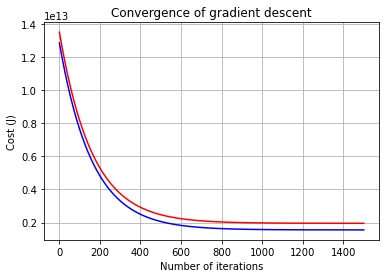

In [14]:
#gradient descent graph
thetap1, cost_historybase, cost_history2 = gradient_descent(stackp1, stackp2, p, p2, thetap1, alpha, iterations)
plt.plot(range(1,iterations+1),cost_historybase,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [15]:
#PROBLEM 1b
#Split Data
from sklearn.model_selection import train_test_split

#Specify training and random seed
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)
df_train.shape
df_test.shape

#Variables
p = df_train.values[:,0] #column 1
a = df_train.values[:,1] #column 2
bed = df_train.values[:,2] #column 3
bath = df_train.values[:,3] #column 4
st = df_train.values[:,4] #column 5
main = df_train.values[:,5] #column 6
guest = df_train.values[:,6] #column 7
base = df_train.values[:,7] #column 8
hot = df_train.values[:,8] #column 9
ac = df_train.values[:,9] #column 10
park = df_train.values[:,10] #column 11
pref = df_train.values[:,11] #column 12
furnish = df_train.values[:,12] #column 13

m = len(df_train)

In [16]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,7160,3,1,1,1,0,1,0,0,2,1,5880000
363,3584,2,1,1,1,0,0,1,0,0,0,3710000
370,4280,2,1,1,1,0,0,0,1,2,0,3640000
31,7000,3,1,4,1,0,0,0,1,2,0,8400000
113,9620,3,1,1,1,0,1,0,0,2,1,6083000


In [17]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,7160,3,1,1,1,0,1,0,0,2,1
363,3584,2,1,1,1,0,0,1,0,0,0
370,4280,2,1,1,1,0,0,0,1,2,0
31,7000,3,1,4,1,0,0,0,1,2,0
113,9620,3,1,1,1,0,1,0,0,2,1


In [18]:
y_Newtrain.head()

126    5880000
363    3710000
370    3640000
31     8400000
113    6083000
Name: price, dtype: int64

In [19]:
#Regression
#Reshape
X_0 = np.ones((m, 1))
rearea = a.reshape(m,1)
rebed = bed.reshape(m,1)
rebath = bath.reshape(m,1)
restories = st.reshape(m,1)
remain = main.reshape(m,1)
reguest = guest.reshape(m,1)
rebasement = base.reshape(m,1)
rehot = hot.reshape(m,1)
reac = ac.reshape(m,1)
reparking = park.reshape(m,1)
repref = pref.reshape(m,1)

In [20]:
#test data X2
#Variables
p2 = df_test.values[:,0] #column 1
a2 = df_test.values[:,1] #column 2
bed2 = df_test.values[:,2] #column 3
bath2 = df_test.values[:,3] #column 4
st2 = df_test.values[:,4] #column 5
main2 = df_test.values[:,5] #column 6
guest2 = df_test.values[:,6] #column 7
base2 = df_test.values[:,7] #column 8
hot2 = df_test.values[:,8] #column 9
ac2 = df_test.values[:,9] #column 10
park2 = df_test.values[:,10] #column 11
pref2 = df_test.values[:,11] #column 12
furnish2 = df_test.values[:,12] #column 13
n = len(df_test)

In [21]:
#reshape
X_02 = np.ones((n, 1))
rearea2 = a2.reshape(n,1)
rebed2 = bed2.reshape(n,1)
rebath2 = bath2.reshape(n,1)
restories2 = st2.reshape(n,1)
remain2 = main2.reshape(n,1)
reguest2 = guest2.reshape(n,1)
rebasement2 = base2.reshape(n,1)
rehot2 = hot2.reshape(n,1)
reac2 = ac2.reshape(n,1)
reparking2 = park2.reshape(n,1)
repref2 = pref2.reshape(n,1)

In [22]:
#Stack
stackp3 = np.hstack((X_0, rearea, rebed, rebath, restories, remain, reguest, rebasement, rehot, reac, reparking, repref))
stackp4 = np.hstack((X_02, rearea2, rebed2, rebath2, restories2, remain2, reguest2, rebasement2, rehot2, reac2, reparking2, repref2))
thetap1b = np.zeros(12)
alpha = 0.000001
iterations = 1500

Text(0.5, 1.0, 'Convergence of gradient descent Prob 1B')

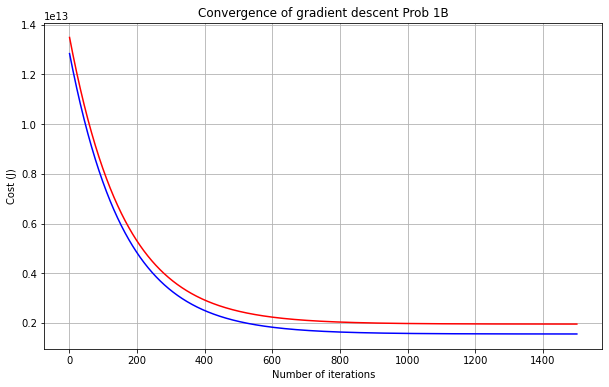

In [23]:
#gradient descent graph
thetap1b, cost_history, cost_history2 = gradient_descent(stackp3, stackp4, p, p2, thetap1b, alpha, iterations)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Prob 1B')

In [24]:
#PROBLEM 2a
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
126,7160,3,1,1,2,5880000
363,3584,2,1,1,0,3710000
370,4280,2,1,1,2,3640000
31,7000,3,1,4,2,8400000
113,9620,3,1,1,2,6083000


In [25]:
#ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#import the Normalization function
from sklearn.preprocessing import MinMaxScaler

housing1[num_vars]=MinMaxScaler().fit_transform(housing1[num_vars])

#Normalize
#minmax_scale = MinMaxScaler().fit(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
#df_minmax = minmax_scale.transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
#Print out
#print('Min-value after normalization:\nArea={:.2f}, bedrooms={:.2f}, bathrooms={:.2f}, stories={:.2f}, parking={:.2f}'
     # .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min(), df_minmax[:,4].min()))
#print('\nMax-value after normalization:\nArea={:.2f}, bedrooms={:.2f}, bathrooms={:.2f}, stories={:.2f}, parking={:.2f}'
      #.format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max(), df_minmax[:,4].max()))
    
#given formula normalization
df_Newtrain[num_vars]=MinMaxScaler().fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price
126,0.378694,0.4,0.000000,0.000000,0.666667,0.393333
363,0.132921,0.2,0.000000,0.000000,0.000000,0.186667
370,0.180756,0.2,0.000000,0.000000,0.666667,0.180000
31,0.367698,0.4,0.000000,1.000000,0.666667,0.633333
113,0.547766,0.4,0.000000,0.000000,0.666667,0.412667
222,0.516564,0.2,0.000000,0.000000,0.666667,0.286667
462,0.035052,0.4,0.000000,0.333333,0.000000,0.126667
177,0.302405,0.4,0.000000,0.000000,0.000000,0.332667
57,0.505155,0.6,0.333333,1.000000,0.333333,0.523333
244,0.252234,0.4,0.000000,0.333333,0.000000,0.266667


In [26]:
#Split Data
from sklearn.model_selection import train_test_split

#Specify training and random seed
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)
df_train.shape
df_test.shape

#Variables
p = df_train.values[:,0] #column 1
a = df_train.values[:,1] #column 2
bed = df_train.values[:,2] #column 3
bath = df_train.values[:,3] #column 4
st = df_train.values[:,4] #column 5
main = df_train.values[:,5] #column 6
guest = df_train.values[:,6] #column 7
base = df_train.values[:,7] #column 8
hot = df_train.values[:,8] #column 9
ac = df_train.values[:,9] #column 10
park = df_train.values[:,10] #column 11
pref = df_train.values[:,11] #column 12
furnish = df_train.values[:,12] #column 13

m = len(df_train)


In [27]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking
126,0.378694,0.4,0.0,0.0,0.666667
363,0.132921,0.2,0.0,0.0,0.000000
370,0.180756,0.2,0.0,0.0,0.666667
31,0.367698,0.4,0.0,1.0,0.666667
113,0.547766,0.4,0.0,0.0,0.666667


In [28]:
y_Newtrain.head()

126    0.393333
363    0.186667
370    0.180000
31     0.633333
113    0.412667
Name: price, dtype: float64

In [29]:
#get normalized values
pnorm = y_Newtrain.values
anorm = df_Newtrain.values[:, 0]
bednorm = df_Newtrain.values[:, 1]
bathnorm = df_Newtrain.values[:, 2]
stnorm = df_Newtrain.values[:, 3]
parknorm = df_Newtrain.values[:, 4]
#Reshape
X_0 = np.ones((m, 1))
rearea = anorm.reshape(m, 1)
rebed = bednorm.reshape(m,1)
rebath = bathnorm.reshape(m,1)
restories = stnorm.reshape(m,1)
reparking = parknorm.reshape(m,1)


In [30]:
#Standardization
#reintialize
df_Newtrain = df_train[num_vars]
#import the Standardization function
from sklearn.preprocessing import StandardScaler

housing2[num_vars]=StandardScaler().fit_transform(housing2[num_vars])

#--------
df_Newtrain[num_vars]=StandardScaler().fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price
126,0.934301,0.055861,-0.553238,-0.907660,1.591603,0.630538
363,-0.710246,-1.274325,-0.553238,-0.907660,-0.800511,-0.593759
370,-0.390167,-1.274325,-0.553238,-0.907660,1.591603,-0.633253
31,0.860719,0.055861,-0.553238,2.573733,1.591603,2.052301
113,2.065617,0.055861,-0.553238,-0.907660,1.591603,0.745068
222,1.856829,-1.274325,-0.553238,-0.907660,1.591603,-0.001358
462,-1.365122,0.055861,-0.553238,0.252805,-0.800511,-0.949200
177,0.423829,0.055861,-0.553238,-0.907660,-0.800511,0.271147
57,1.780488,1.386046,1.554599,2.573733,0.395546,1.400660
244,0.088113,0.055861,-0.553238,0.252805,-0.800511,-0.119838


In [31]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [32]:
#get standardize values
pstd = y_Newtrain.values
astd = df_Newtrain.values[:, 0]
bedstd = df_Newtrain.values[:, 1]
bathstd = df_Newtrain.values[:, 2]
ststd = df_Newtrain.values[:, 3]
parkstd = df_Newtrain.values[:, 4]
#Reshape
X_02 = np.ones((m, 1))
rearea2 = astd.reshape(m, 1)
rebed2 = bedstd.reshape(m,1)
rebath2 = bathstd.reshape(m,1)
restories2 = ststd.reshape(m,1)
reparking2 = parkstd.reshape(m,1)


In [33]:
#test data1
#Variables
ptest = housing1.values[:,0] #column 1
atest = housing1.values[:,1] #column 2
bedtest = housing1.values[:,2] #column 3
bathtest = housing1.values[:,3] #column 4
sttest = housing1.values[:,4] #column 5
maintest = housing1.values[:,5] #column 6
guesttest = housing1.values[:,6] #column 7
basetest = housing1.values[:,7] #column 8
hottest = housing1.values[:,8] #column 9
actest = housing1.values[:,9] #column 10
parktest = housing1.values[:,10] #column 11
preftest = housing1.values[:,11] #column 12
furnishtest = housing1.values[:,12] #column 13
n = len(housing1)

In [34]:
#reshape test data1
X_test = np.ones((n, 1))
rearea3 = atest.reshape(n,1)
rebed3 = bedtest.reshape(n,1)
rebath3 = bathtest.reshape(n,1)
restories3 = sttest.reshape(n,1)
remain3 = maintest.reshape(n,1)
reguest3 = guesttest.reshape(n,1)
rebasement3 = basetest.reshape(n,1)
rehot3 = hottest.reshape(n,1)
reac3 = actest.reshape(n,1)
reparking3 = parktest.reshape(n,1)
repref3 = preftest.reshape(n,1)

In [35]:
#test data2
#Variables
ptest2 = housing2.values[:,0] #column 1
atest = housing2.values[:,1] #column 2
bedtest = housing2.values[:,2] #column 3
bathtest = housing2.values[:,3] #column 4
sttest = housing2.values[:,4] #column 5
maintest = housing2.values[:,5] #column 6
guesttest = housing2.values[:,6] #column 7
basetest = housing2.values[:,7] #column 8
hottest = housing2.values[:,8] #column 9
actest = housing2.values[:,9] #column 10
parktest = housing2.values[:,10] #column 11
preftest = housing2.values[:,11] #column 12
furnishtest = housing2.values[:,12] #column 13
n = len(housing2)

In [36]:
#reshape test data2
X_test2 = np.ones((n, 1))
rearea4 = atest.reshape(n,1)
rebed4 = bedtest.reshape(n,1)
rebath4 = bathtest.reshape(n,1)
restories4 = sttest.reshape(n,1)
remain4 = maintest.reshape(n,1)
reguest4 = guesttest.reshape(n,1)
rebasement4 = basetest.reshape(n,1)
rehot4 = hottest.reshape(n,1)
reac4 = actest.reshape(n,1)
reparking4 = parktest.reshape(n,1)
repref4 = preftest.reshape(n,1)

In [37]:
#Stack
stackp5 = np.hstack((X_0, rearea, rebed, rebath, restories, reparking)) #training
stackp6 = np.hstack((X_02, rearea2, rebed2, rebath2, restories2, reparking2)) #training
stackp7 = np.hstack((X_test, rearea3, rebed3, rebath3, restories3, reparking3)) #test
stackp8 = np.hstack((X_test2, rearea4, rebed4, rebath4, restories4, reparking4))#test
stacktest1 = np.hstack((X_test, rearea3, rebed3, rebath3, restories3, remain3, reguest3, rebasement3, rehot3, reac3, reparking3, repref3)) #test2bnorm
stacktest2 = np.hstack((X_test2, rearea4, rebed4, rebath4, restories4, remain4, reguest4, rebasement4, rehot4, reac4, reparking4, repref4)) #test2bstd
thetap2 = np.zeros(6)

Text(0.5, 1.0, 'Convergence of gradient descent Norm training and validation')

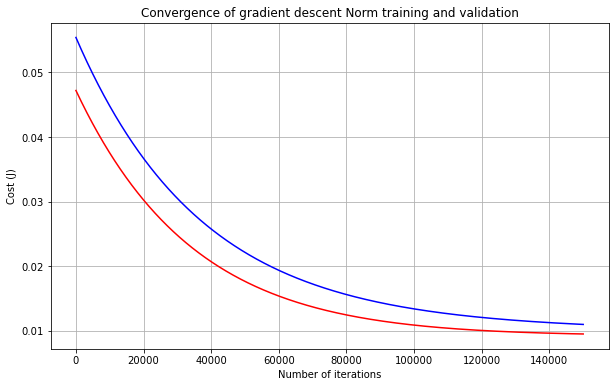

In [38]:
alpha = 0.1
iterations = 150000
#gradient descent graph for Normalized
thetap2, cost_history, cost_history2 = gradient_descent(stackp5, stackp7, pnorm, ptest, thetap2, alpha, iterations)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Norm training and validation')

Text(0.5, 1.0, 'Convergence of gradient descent Std training and validation')

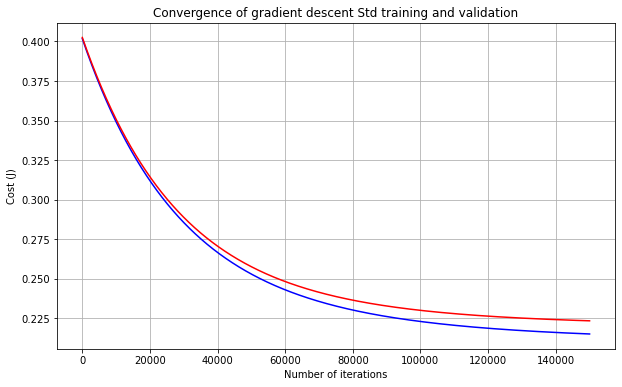

In [39]:
#gradient descent graph for Standardized
alpha = 0.1
iterations = 150000
thetap2, cost_history, cost_history2 = gradient_descent(stackp6, stackp8, pstd, ptest2, thetap2, alpha, iterations)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Std training and validation')

In [40]:
#Problem 2b
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,7160,3,1,1,1,0,1,0,0,2,1,5880000
363,3584,2,1,1,1,0,0,1,0,0,0,3710000
370,4280,2,1,1,1,0,0,0,1,2,0,3640000
31,7000,3,1,4,1,0,0,0,1,2,0,8400000
113,9620,3,1,1,1,0,1,0,0,2,1,6083000


In [41]:
#ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#import the Normalization function
from sklearn.preprocessing import MinMaxScaler
    
#given formula normalization
df_Newtrain[num_vars]=MinMaxScaler().fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,0.378694,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.393333
363,0.132921,0.2,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.186667
370,0.180756,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.180000
31,0.367698,0.4,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.633333
113,0.547766,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.412667
222,0.516564,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.286667
462,0.035052,0.4,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.126667
177,0.302405,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.332667
57,0.505155,0.6,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.523333
244,0.252234,0.4,0.000000,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.266667


In [42]:
#Split Data
from sklearn.model_selection import train_test_split

#Specify training and random seed
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)
df_train.shape
df_test.shape

#Variables
p = df_train.values[:,0] #column 1
a = df_train.values[:,1] #column 2
bed = df_train.values[:,2] #column 3
bath = df_train.values[:,3] #column 4
st = df_train.values[:,4] #column 5
main = df_train.values[:,5] #column 6
guest = df_train.values[:,6] #column 7
base = df_train.values[:,7] #column 8
hot = df_train.values[:,8] #column 9
ac = df_train.values[:,9] #column 10
park = df_train.values[:,10] #column 11
pref = df_train.values[:,11] #column 12
furnish = df_train.values[:,12] #column 13

m = len(df_train)


In [43]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,0.378694,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
363,0.132921,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0
370,0.180756,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
31,0.367698,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
113,0.547766,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0


In [44]:
y_Newtrain.head()

126    0.393333
363    0.186667
370    0.180000
31     0.633333
113    0.412667
Name: price, dtype: float64

In [45]:
#get normalized values 2b
pnorm = y_Newtrain.values
anorm = df_Newtrain.values[:, 0]
bednorm = df_Newtrain.values[:, 1]
bathnorm = df_Newtrain.values[:, 2]
stnorm = df_Newtrain.values[:, 3]
mainnorm = df_Newtrain.values[:, 4] 
guestnorm = df_Newtrain.values[:, 5]
basenorm = df_Newtrain.values[:, 6]
hotnorm = df_Newtrain.values[:, 7]
acnorm = df_Newtrain.values[:, 8]
parknorm = df_Newtrain.values[:, 9]
prefnorm = df_Newtrain.values[:, 10]
#Reshape
X_0 = np.ones((m, 1))
rearea = anorm.reshape(m, 1)
rebed = bednorm.reshape(m,1)
rebath = bathnorm.reshape(m,1)
restories = stnorm.reshape(m,1)
remain = mainnorm.reshape(m,1)
reguest = guestnorm.reshape(m,1)
rebase = basenorm.reshape(m,1)
rehot = hotnorm.reshape(m,1)
reac = acnorm.reshape(m,1)
repark = parknorm.reshape(m,1)
repref = prefnorm.reshape(m,1)

In [46]:
#Standardization
#reintialize
df_Newtrain = df_train[num_vars]
#import the Standardization function
from sklearn.preprocessing import StandardScaler

#--------
df_Newtrain[num_vars]=StandardScaler().fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
126,0.934301,0.055861,-0.553238,-0.907660,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.591603,1.798147,0.630538
363,-0.710246,-1.274325,-0.553238,-0.907660,0.397561,-0.478573,-0.749317,4.248529,-0.682191,-0.800511,-0.556128,-0.593759
370,-0.390167,-1.274325,-0.553238,-0.907660,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.591603,-0.556128,-0.633253
31,0.860719,0.055861,-0.553238,2.573733,0.397561,-0.478573,-0.749317,-0.235376,1.465865,1.591603,-0.556128,2.052301
113,2.065617,0.055861,-0.553238,-0.907660,0.397561,-0.478573,1.334549,-0.235376,-0.682191,1.591603,1.798147,0.745068
222,1.856829,-1.274325,-0.553238,-0.907660,0.397561,-0.478573,1.334549,-0.235376,1.465865,1.591603,-0.556128,-0.001358
462,-1.365122,0.055861,-0.553238,0.252805,-2.515338,-0.478573,1.334549,-0.235376,-0.682191,-0.800511,-0.556128,-0.949200
177,0.423829,0.055861,-0.553238,-0.907660,0.397561,-0.478573,1.334549,-0.235376,-0.682191,-0.800511,1.798147,0.271147
57,1.780488,1.386046,1.554599,2.573733,0.397561,2.089545,-0.749317,-0.235376,1.465865,0.395546,1.798147,1.400660
244,0.088113,0.055861,-0.553238,0.252805,0.397561,2.089545,1.334549,-0.235376,-0.682191,-0.800511,1.798147,-0.119838


In [47]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [48]:
#get standardize values
pstd = y_Newtrain.values
astd = df_Newtrain.values[:, 0]
bedstd = df_Newtrain.values[:, 1]
bathstd = df_Newtrain.values[:, 2]
ststd = df_Newtrain.values[:, 3]
mainstd = df_Newtrain.values[:, 4] 
gueststd = df_Newtrain.values[:, 5]
basestd = df_Newtrain.values[:, 6]
hotstd = df_Newtrain.values[:, 7]
acstd = df_Newtrain.values[:, 8]
parkstd = df_Newtrain.values[:, 9]
prefstd = df_Newtrain.values[:, 10]
#Reshape
X_02 = np.ones((m, 1))
rearea2 = astd.reshape(m, 1)
rebed2 = bedstd.reshape(m,1)
rebath2 = bathstd.reshape(m,1)
restories2 = ststd.reshape(m,1)
remain2 = mainstd.reshape(m,1)
reguest2 = gueststd.reshape(m,1)
rebase2 = basestd.reshape(m,1)
rehot2 = hotstd.reshape(m,1)
reac2 = acstd.reshape(m,1)
repark2 = parkstd.reshape(m,1)
repref2 = prefstd.reshape(m,1)

In [49]:
#Stack
stackp9 = np.hstack((X_0, rearea, rebed, rebath, restories, remain, reguest, rebase, rehot, reac, repark, repref)) #training norm
stackp10 = np.hstack((X_02, rearea2, rebed2, rebath2, restories2, remain2, reguest2, rebase2, rehot2, reac2, repark2, repref2)) #training std
thetap2 = np.zeros(12)

Text(0.5, 1.0, 'Convergence of gradient descent Norm training and validation 2b')

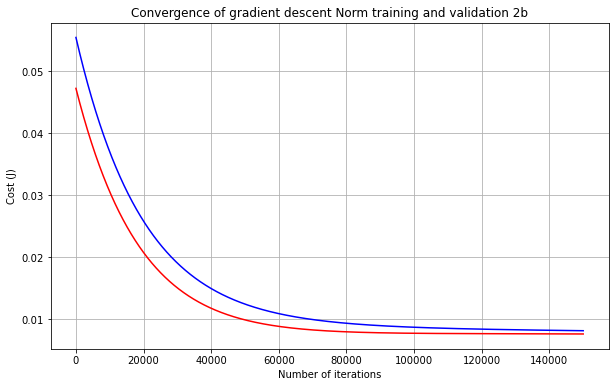

In [50]:
alpha = 0.1
iterations = 150000
#gradient descent graph for Normalized
thetap2, cost_history, cost_history2 = gradient_descent(stackp9, stacktest1, pnorm, ptest, thetap2, alpha, iterations)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Norm training and validation 2b')

Text(0.5, 1.0, 'Convergence of gradient descent Std training and validation 2b')

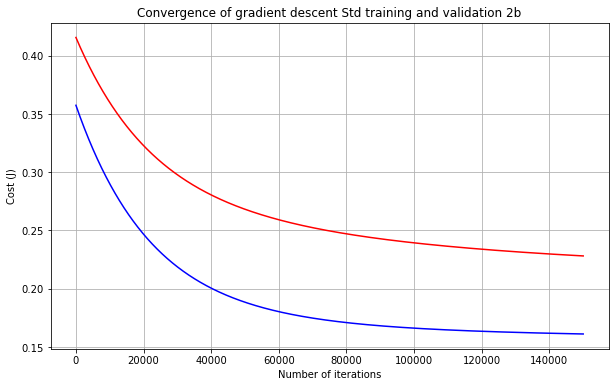

In [51]:
#gradient descent graph for Standardized
alpha = 0.1
iterations = 150000
thetap2, cost_history, cost_history2 = gradient_descent(stackp10, stacktest2, pstd, ptest2, thetap2, alpha, iterations)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Std training and validation 2b')

In [52]:
#Problem3a
#updated cost function
#cost function
def compute_cost(X, y, m, theta, lm, penalty):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    if (penalty == 0):
        J = 1 / (2 * m) * np.sum(sqrErrors)
    else:
        J = 1 / (2*m) * (np.sum(sqrErrors) + lm * (np.sum(theta) - theta[0]))
    
    return J

In [53]:
#Updated gradient function
def gradient_descent(X, X2, y, y2, theta, alpha, iterations, lm, penalty):
    
    cost_historybase = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions/10000, y/10000)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        if (penalty == 0):
            theta = theta - sum_delta;
        else:
            theta = theta * (1 - alpha * (lm/m)) - sum_delta;
        cost_historybase[i] = compute_cost(X, y, m, theta, lm, penalty)
        cost_history2[i] = compute_cost(X2, y2, n, theta, lm, penalty)
    
    return theta, cost_historybase, cost_history2

Text(0.5, 1.0, 'Convergence of gradient descent Norm training and validation 3a')

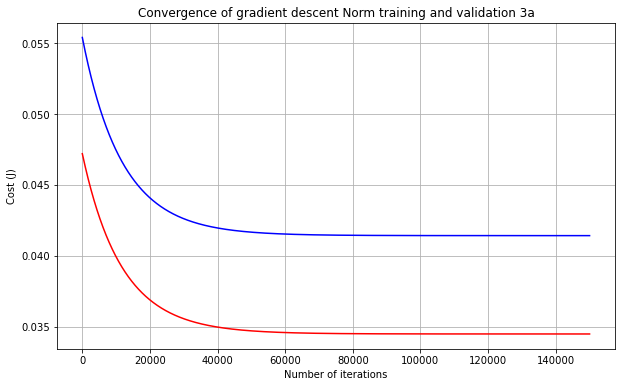

In [54]:
thetap2 = np.zeros(6)
alpha = 0.1
iterations = 150000
#gradient descent graph for Normalized
thetap2, cost_history, cost_history2 = gradient_descent(stackp5, stackp7, pnorm, ptest, thetap2, alpha, iterations, 0.25, 1)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Norm training and validation 3a')

Text(0.5, 1.0, 'Convergence of gradient descent Std training and validation 3a')

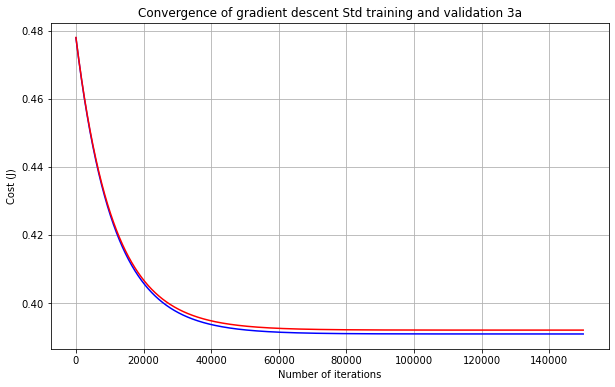

In [55]:
#gradient descent graph for Standardized
alpha = 0.1
iterations = 150000
thetap2, cost_history, cost_history2 = gradient_descent(stackp6, stackp8, pstd, ptest2, thetap2, alpha, iterations, 0.25, 1)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Std training and validation 3a')

Text(0.5, 1.0, 'Convergence of gradient descent Norm training and validation 3b')

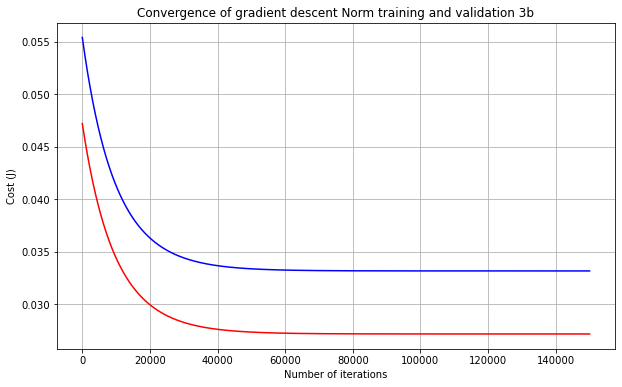

In [56]:
#Problem 3b
thetap2 = np.zeros(12) #larger data set
alpha = 0.1
iterations = 150000
#gradient descent graph for Normalized
thetap2, cost_history, cost_history2 = gradient_descent(stackp9, stacktest1, pnorm, ptest, thetap2, alpha, iterations, 0.25, 1)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Norm training and validation 3b')

Text(0.5, 1.0, 'Convergence of gradient descent Std training and validation 3b')

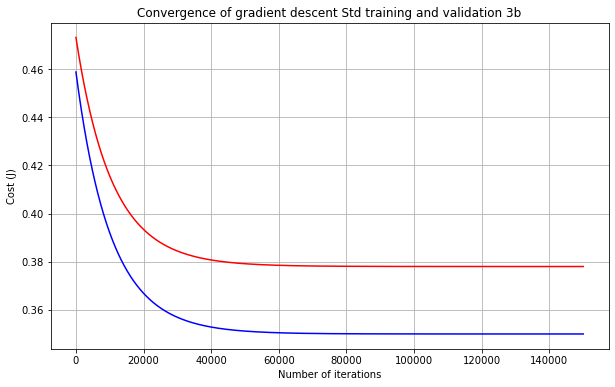

In [57]:
#gradient descent graph for Standardized
alpha = 0.1
iterations = 150000
thetap2, cost_history, cost_history2 = gradient_descent(stackp10, stacktest2, pstd, ptest2, thetap2, alpha, iterations, 0.25, 1)
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Std training and validation 3b')